In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
data = pd.read_csv("D:\ExcelR Assignments\Question\MLR\MLR\ToyotaCorolla - MLR.csv")

In [3]:
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [4]:
data.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [5]:
data.duplicated().sum()

np.int64(1)

In [6]:
data.drop_duplicates(inplace=True,keep='first')

In [7]:
data.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [8]:
data.duplicated().sum()

np.int64(0)

In [9]:
data.rename(columns={'Age_08_04':'Age'},inplace = True)

## Data visualization

In [10]:
data.dtypes

Price         int64
Age           int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

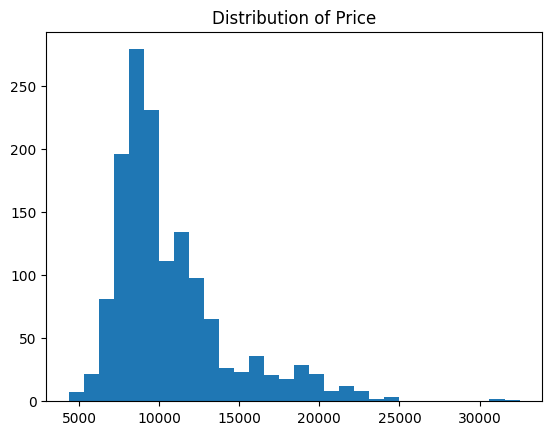

In [11]:
plt.hist(data['Price'],bins=30);
plt.title("Distribution of Price");

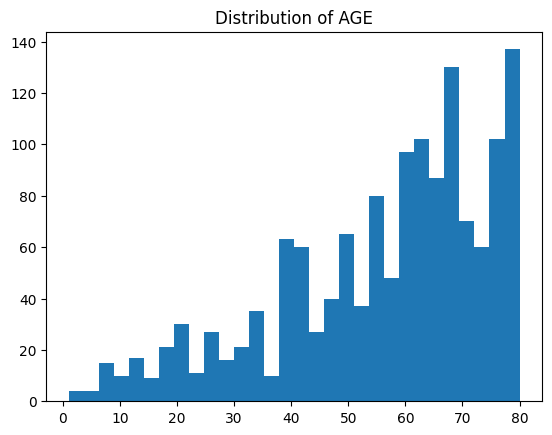

In [12]:
plt.hist(data['Age'],bins=30);
plt.title("Distribution of AGE");

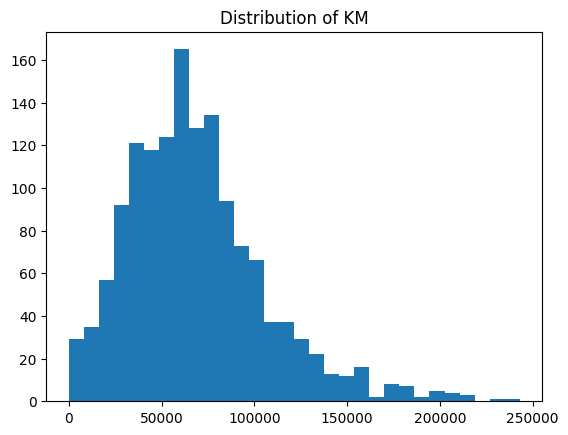

In [13]:
plt.hist(data['KM'],bins=30);
plt.title("Distribution of KM");

Text(0, 0.5, 'Count')

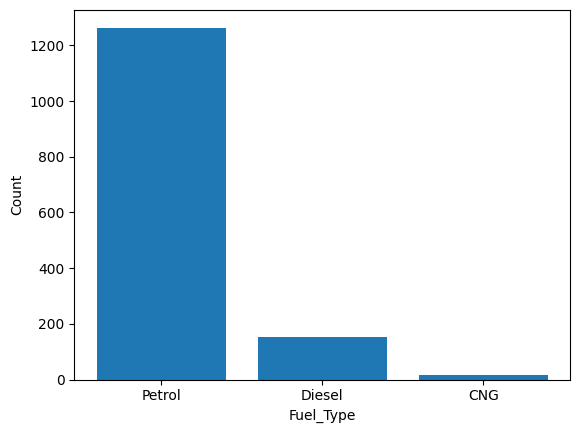

In [14]:
plt.bar(x=data['Fuel_Type'].value_counts().index,height=data['Fuel_Type'].value_counts().values)
plt.xlabel('Fuel_Type')
plt.ylabel('Count')

Text(0.5, 1.0, 'HP')

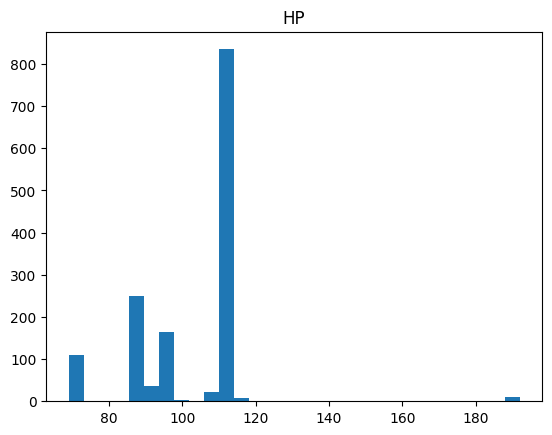

In [15]:
plt.hist(data['HP'],bins=30);
plt.title("HP")

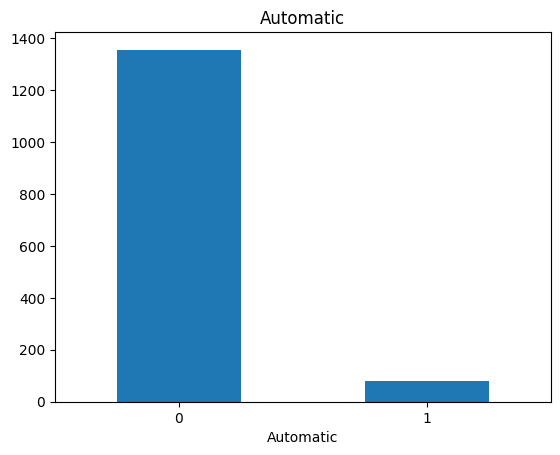

In [16]:
data['Automatic'].value_counts().plot(kind='bar')
plt.title("Automatic")
plt.xticks(rotation=0);

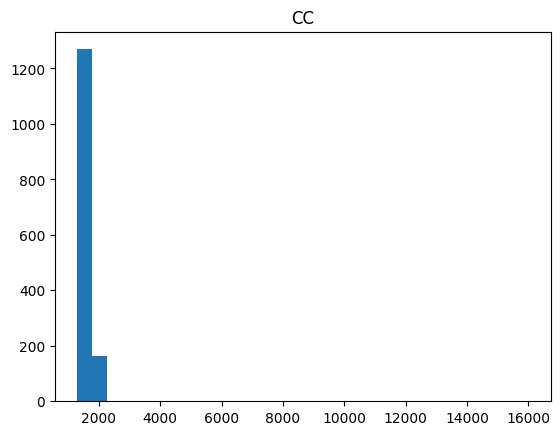

In [17]:
plt.hist(data['cc'],bins=30);
plt.title("CC");

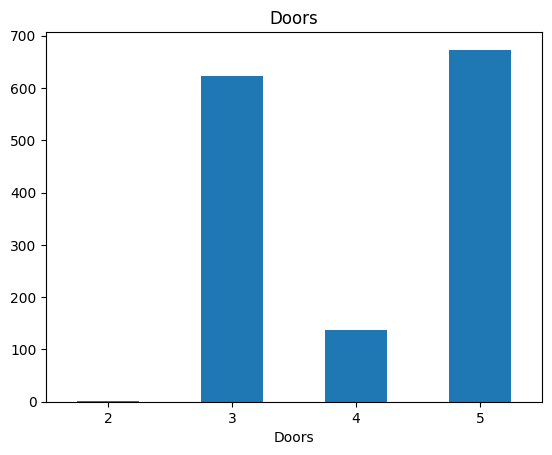

In [18]:
data['Doors'].value_counts().sort_index().plot(kind='bar')
plt.title("Doors")
plt.xticks(rotation=0);

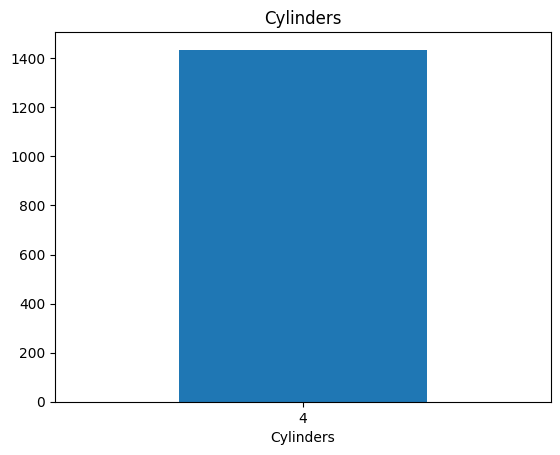

In [19]:
data['Cylinders'].value_counts().plot(kind='bar')
plt.title("Cylinders")
plt.xticks(rotation=0);

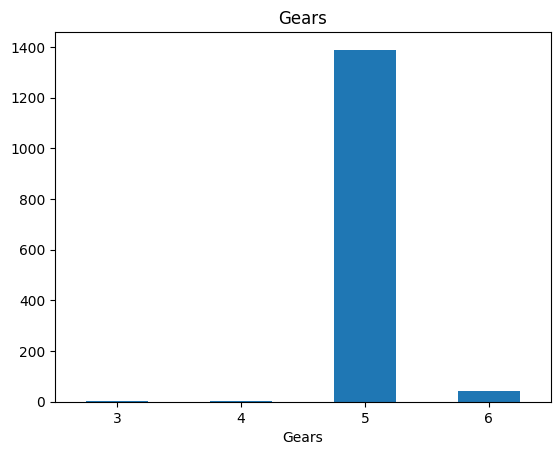

In [20]:
data['Gears'].value_counts().sort_index().plot(kind='bar')
plt.title("Gears")
plt.xticks(rotation=0);

Text(0.5, 0, 'Weight of Car')

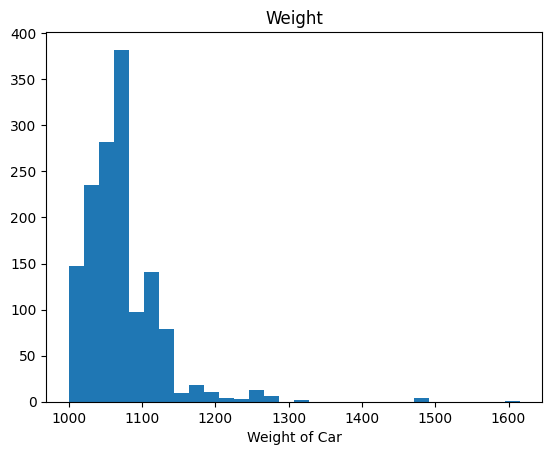

In [21]:
plt.hist(data['Weight'],bins=30);
plt.title("Weight")
plt.xlabel('Weight of Car')

<Axes: >

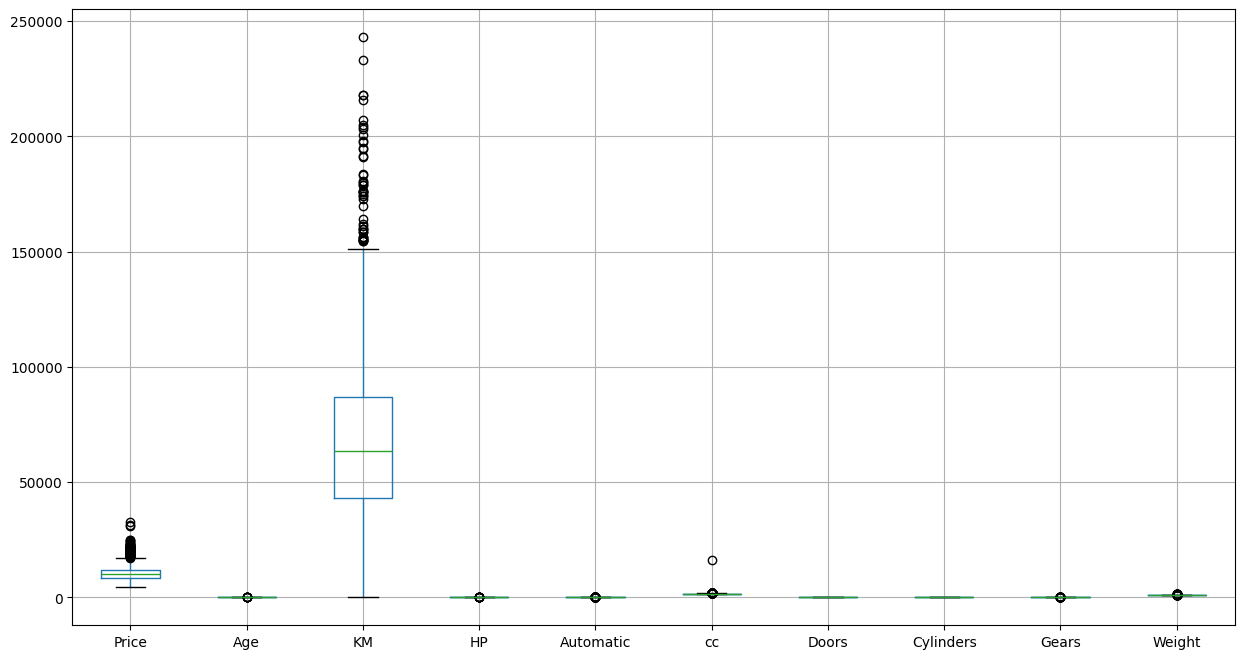

In [22]:
plt.figure(figsize=(15,8))
data.boxplot()

In [23]:
# Function to cap outliers
def capping(data,columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)
        data.loc[:,col] = data[col].clip(lower=lower_bound , upper = upper_bound)

In [24]:
# 'Fuel_Type','Gears','Cylinders','Automatic' are categorical columns
capping(data,data.drop(['Fuel_Type','Gears','Cylinders','Automatic','Doors'],axis = 1).columns.tolist())

<Axes: >

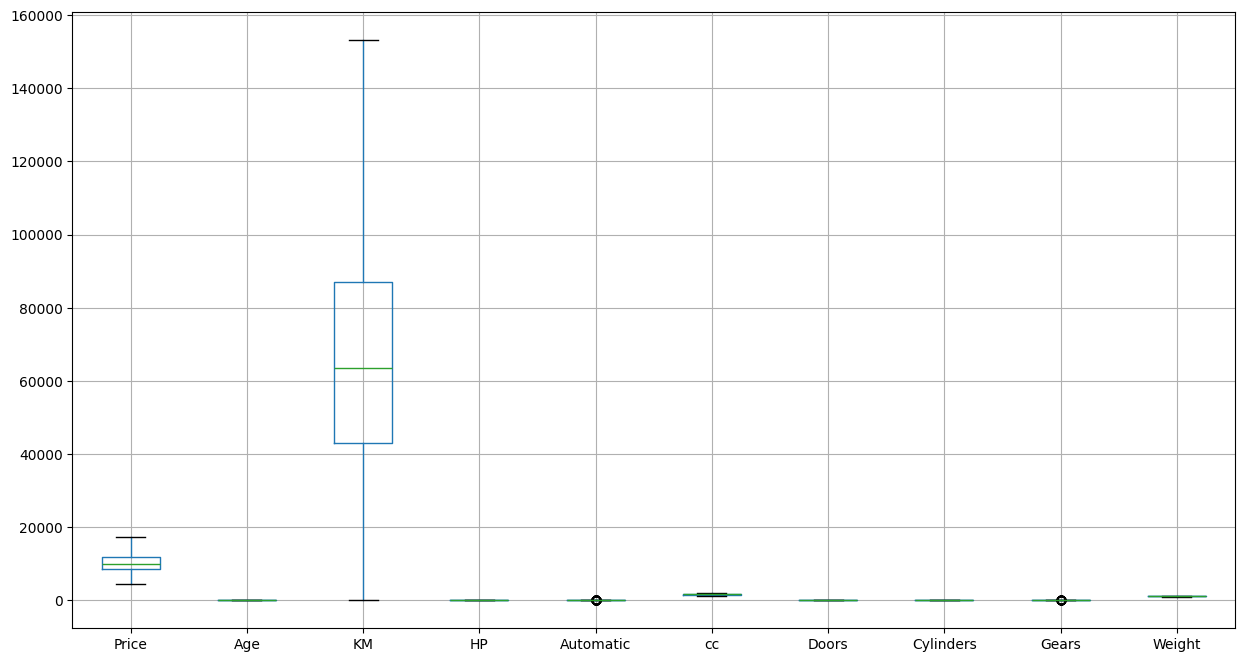

In [25]:
plt.figure(figsize=(15,8))
data.boxplot()

In [26]:
data.describe()

,Price,Age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.0,1435.000000,1435.000000
mean,10495.964460,55.992334,67644.520383,101.093380,0.055749,1558.327526,4.032753,4.0,5.026481,1068.520906
std,2977.598549,18.529725,34725.393258,13.146145,0.229517,168.788311,0.952667,0.0,0.188575,37.722708
min,4350.000000,5.000000,1.000000,69.000000,0.000000,1300.000000,2.000000,4.0,3.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.000000,3.000000,4.0,5.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,0.000000,1600.000000,4.000000,4.0,5.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,0.000000,1600.000000,5.000000,4.0,5.000000,1085.000000
max,17200.000000,80.000000,153103.750000,140.000000,1.000000,1900.000000,5.000000,4.0,6.000000,1152.500000


### Removing Multicollinearity

<Axes: >

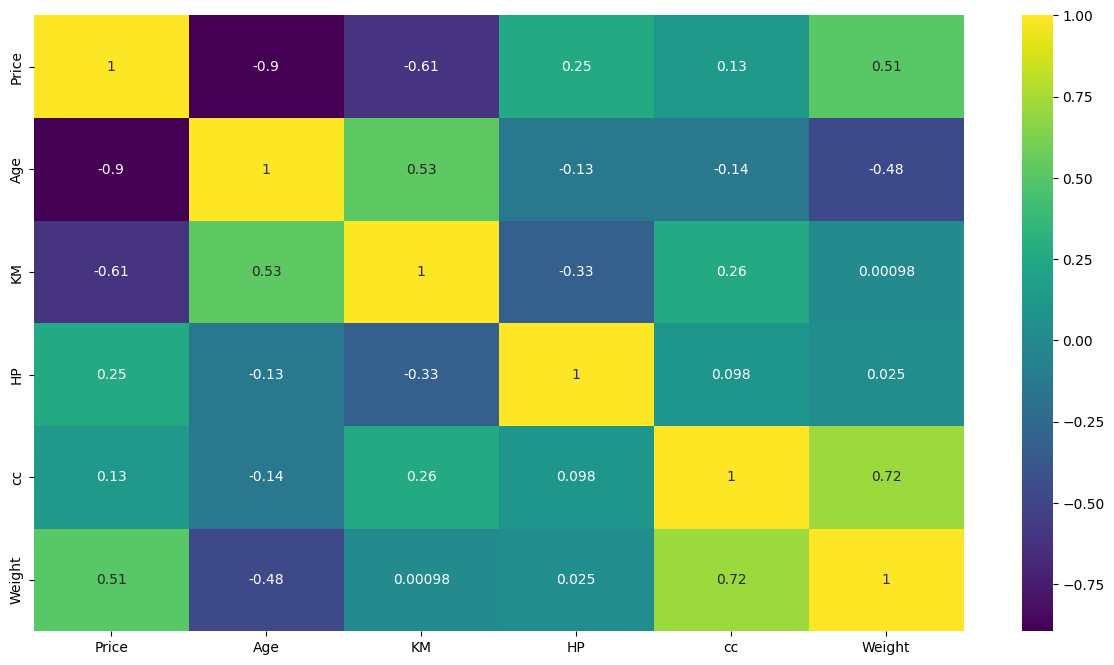

In [27]:
plt.figure(figsize=(15,8))
sns.heatmap(data.drop(['Fuel_Type','Cylinders','Doors','Gears','Automatic'],axis = 1).corr(),annot=True,cmap='viridis')

In [28]:
n_columns = ['Fuel_Type','Automatic', 'Cylinders', 'Gears','Weight','cc','HP','Doors'] 

# Step 2: Create a new DataFrame excluding categorical columns
X = data.drop(columns=n_columns)
# Step 3: Calculate VIF for each numerical column
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Step 4: Display the results
print(vif)

  Feature       VIF
0   Price  3.340359
1     Age  8.587965
2      KM  6.584705


In [29]:
# Dropping columns to avoid multicollinearity
data1 = data.drop(['Weight','cc','HP'], axis = 1)  # Creating new dataframe

In [30]:
data1

,Price,Age,KM,Fuel_Type,Automatic,Doors,Cylinders,Gears
0,13500,23,46986.0,Diesel,0,3,4,5
1,13750,23,72937.0,Diesel,0,3,4,5
2,13950,24,41711.0,Diesel,0,3,4,5
3,14950,26,48000.0,Diesel,0,3,4,5
4,13750,30,38500.0,Diesel,0,3,4,5
...,...,...,...,...,...,...,...,...
1431,7500,69,20544.0,Petrol,0,3,4,5
1432,10845,72,19000.0,Petrol,0,3,4,5
1433,8500,71,17016.0,Petrol,0,3,4,5
1434,7250,70,16916.0,Petrol,0,3,4,5


In [31]:
data1 = pd.get_dummies(data1, columns=['Fuel_Type'], drop_first = True).astype(int)

In [32]:
data1

,Price,Age,KM,Automatic,Doors,Cylinders,Gears,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,0,3,4,5,1,0
1,13750,23,72937,0,3,4,5,1,0
2,13950,24,41711,0,3,4,5,1,0
3,14950,26,48000,0,3,4,5,1,0
4,13750,30,38500,0,3,4,5,1,0
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,0,3,4,5,0,1
1432,10845,72,19000,0,3,4,5,0,1
1433,8500,71,17016,0,3,4,5,0,1
1434,7250,70,16916,0,3,4,5,0,1


### Standardization

In [33]:
sc = StandardScaler()
columns = ['Age', 'KM']
data1[columns] = sc.fit_transform(data1[columns])

In [34]:
x = data1.iloc[:,1:9]
y = data1.iloc[:,[0]]

In [35]:
x

,Age,KM,Automatic,Doors,Cylinders,Gears,Fuel_Type_Diesel,Fuel_Type_Petrol
0,-1.781129,-0.595119,0,3,4,5,1,0
1,-1.781129,0.152464,0,3,4,5,1,0
2,-1.727143,-0.747078,0,3,4,5,1,0
3,-1.619171,-0.565908,0,3,4,5,1,0
4,-1.403226,-0.839579,0,3,4,5,1,0
...,...,...,...,...,...,...,...,...
1431,0.702234,-1.356846,0,3,4,5,0,1
1432,0.864192,-1.401324,0,3,4,5,0,1
1433,0.810206,-1.458478,0,3,4,5,0,1
1434,0.756220,-1.461359,0,3,4,5,0,1


In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,shuffle = True,random_state=42) 

### Multiple Linear Regression

In [37]:
model = LinearRegression()

In [38]:
model.fit(x_train,y_train)

LinearRegression()

In [39]:
y_pred = model.predict(x_test)

In [40]:
train_score = model.score(x_train,y_train)
test_score = model.score(x_test,y_test)

In [41]:
print(f"Training R-Square is {train_score}")
print(f"Testing R-Square is {test_score}")

Training R-Square is 0.8362979919995296
Testing R-Square is 0.8370622892526929


### Lasso Regression

In [42]:
lasso = Lasso(alpha=0.4)
lasso.fit(x_train,y_train)

Lasso(alpha=0.4)

In [43]:
train_score1 = lasso.score(x_train,y_train)
test_score1 = lasso.score(x_test,y_test) 

In [44]:
print(f"Training R-Square is {train_score1}")
print(f"Testing R-Square is {test_score1}")

Training R-Square is 0.8362961009695202
Testing R-Square is 0.837011111285773


### Ridge Regression

In [45]:
rr = Ridge(alpha=1)
rr.fit(x_train,y_train)

Ridge(alpha=1)

In [46]:
train_score2 = rr.score(x_train, y_train)
test_score2 = rr.score(x_test, y_test)

In [47]:
print(f"Training R-Square is {train_score2}")
print(f"Testing R-Square is {test_score2}")

Training R-Square is 0.836293139859275
Testing R-Square is 0.8370287739456274


### Interview Questions